# Advent of Code 2021 edition -Days 6 to 10-

In [1]:
# necessary imports
from pathlib import Path
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT_DIR = Path().resolve().parents[3]
DATA_DIR = ROOT_DIR / "data" / "2021"

DATA_DIR

WindowsPath('C:/Users/User/Documents/Projects/advent-code/data/2021')

# --- Day 6: Lanternfish ---

In [3]:
def load_data_day_6() -> List[int]:
    day_six_file = DATA_DIR / "day6"
    with open(day_six_file, "r") as f:
        return [int(age) for age in f.read().split(",")]
    
lanternfishes = load_data_day_6()
lanternfishes[:5]

[4, 5, 3, 2, 3]

In [4]:
# main functions
def evolve_lanternfishes(lanternfishes: List[int]) -> List[int]:
    """Takes a list of lanternfish timers from T iteration (in days) and returns it at T+1

    Every day, each timer from the list decreases by 1 and resets to 6 after it hits 0 as
    controlled by the `% 7` operator. Before decreasing, the function checks whether the
    population increased and adds 8 to the list everytime it finds a timer value of 0.

    Parameters
    ----------
    lanternfishes : List[int]
        List of lanternfish timers at T

    Returns
    -------
    List[int]
        List of lanternfish timers at T+1
    """
    newborn_lanternfishes = sum([lanternfish == 0 for lanternfish in lanternfishes])
    return [(lanternfish - 1) % 7 if lanternfish < 7 else lanternfish - 1 for lanternfish in lanternfishes] + [
        8 for _ in range(newborn_lanternfishes)
    ]


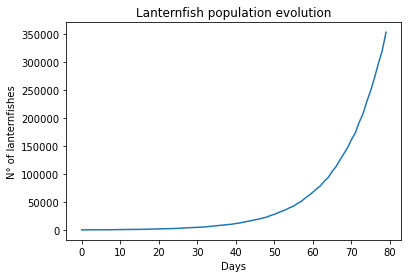

In [5]:
# illustration
t_max = 80
lfish_pop = []

evo_population = lanternfishes[:]

for _ in range(t_max):
    evo_population = evolve_lanternfishes(evo_population)
    lfish_pop.append(len(evo_population))
    
fig, ax = plt.subplots()
ax.plot(np.arange(t_max), lfish_pop)
ax.set_title("Lanternfish population evolution")
ax.set_ylabel("N° of lanternfishes")
ax.set_xlabel("Days")
plt.show()

We can see that the lanternfish population evolution obeys an exponential law that can be written like so:

$$
D = A \times \exp^{Bt}
$$

# --- Day 9: Smoke Basin ---

In [6]:
def load_data_day_9() -> List[int]:
    day_nine_file = DATA_DIR / "day9"
    with open(day_nine_file, "r") as f:
        return [[int(letter) for letter in line.strip()] for line in f.readlines()]

    
heightmap = load_data_day_9()
heightmap = np.array(heightmap)

hm_rows, hm_cols = heightmap.shape

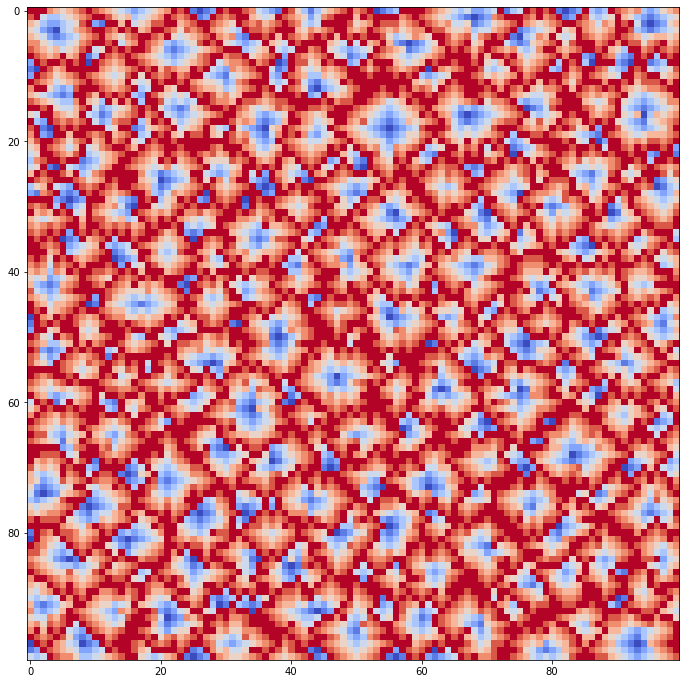

In [7]:
%matplotlib inline

from matplotlib import cm

fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(heightmap, cmap=cm.coolwarm, vmin=0, vmax=9)

plt.show()

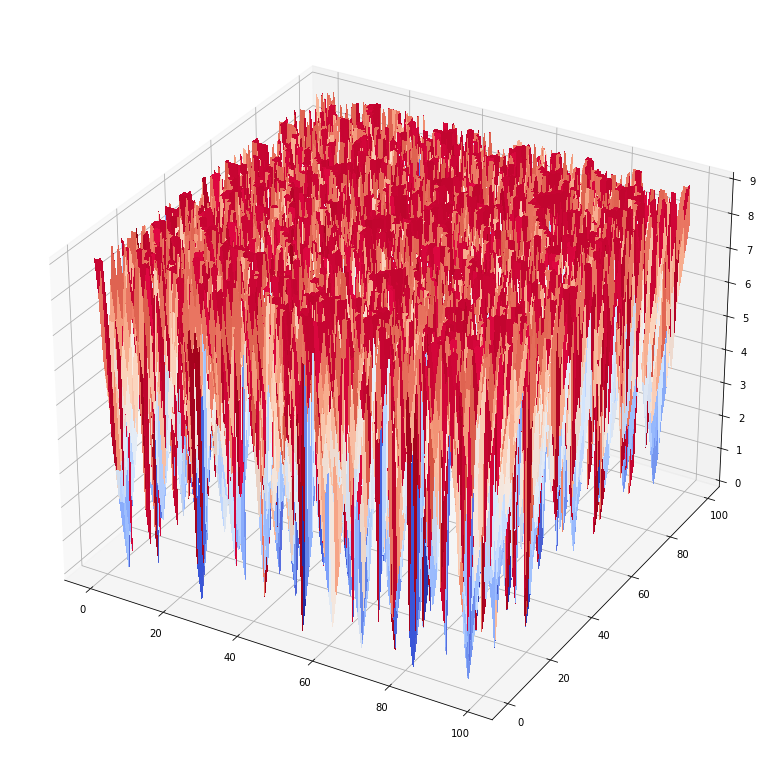

In [8]:
# To make the widget responsive
# %matplotlib widget
# revert to inline
%matplotlib inline
from matplotlib.colors import LightSource


x = np.arange(hm_cols)
y = np.arange(hm_rows)
x, y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,14))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(heightmap, cmap=cm.coolwarm, vert_exag=0.1, blend_mode='soft', vmin=0, vmax=9)
surf = ax.plot_surface(x, y, heightmap, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [9]:
print(np.vstack([heightmap[1:, :], np.zeros((1, 100))] ).shape, 
      np.hstack([heightmap[:, 1:], np.zeros((100, 1))] ).shape, 
      np.vstack([np.zeros((1, 100)), heightmap[:-1, :]]).shape, 
      np.hstack([np.zeros((100,1)) , heightmap[:, :-1]]).shape
     )

(100, 100) (100, 100) (100, 100) (100, 100)


In [10]:
multiply_mask = np.ones(heightmap.shape)
multiply_mask = multiply_mask * 4

multiply_mask[0, :] = 3
multiply_mask[:, 0] = 3
multiply_mask[-1, :] = 3
multiply_mask[:, -1] = 3

multiply_mask[ 0, 0] = 2
multiply_mask[-1,-1] = 2
multiply_mask[ 0,-1] = 2
multiply_mask[-1, 0] = 2

multiply_mask

array([[2., 3., 3., ..., 3., 3., 2.],
       [3., 4., 4., ..., 4., 4., 3.],
       [3., 4., 4., ..., 4., 4., 3.],
       ...,
       [3., 4., 4., ..., 4., 4., 3.],
       [3., 4., 4., ..., 4., 4., 3.],
       [2., 3., 3., ..., 3., 3., 2.]])

In [11]:
diff = (heightmap * multiply_mask) - (np.vstack([heightmap[1:, :], np.zeros((1, 100))] )+ np.hstack([heightmap[:, 1:], np.zeros((100, 1))] )+ np.vstack([np.zeros((1, 100)), heightmap[:-1, :]])+ np.hstack([np.zeros((100,1)) , heightmap[:, :-1]]))

(heightmap[diff < 0] + 1).sum()

31269

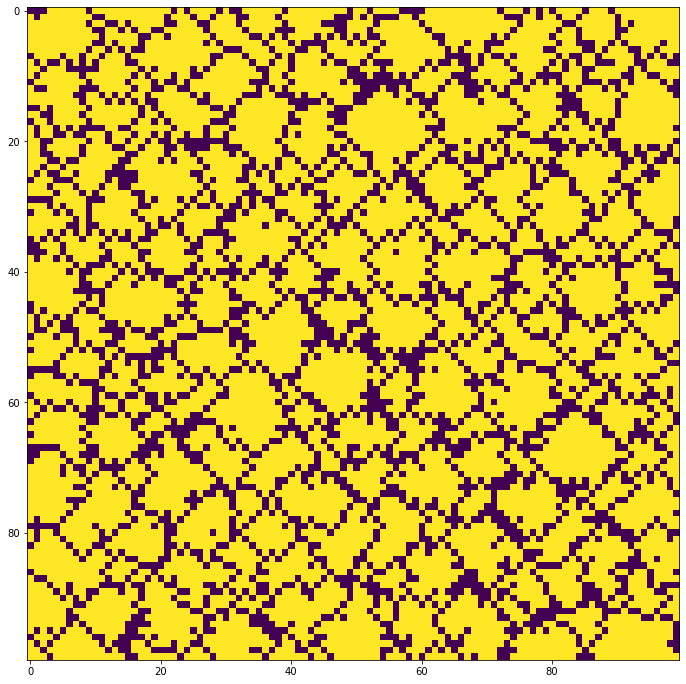

In [12]:
plt, ax = plt.subplots(figsize=(12, 12))

basins = heightmap != 9

ax.imshow(basins)